<a href="https://colab.research.google.com/github/Rizm10/Customer_churn_dashboard/blob/main/Telco_dasboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
!pip install streamlit
import streamlit as st
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read csv etc
df = pd.read_csv('/content/drive/MyDrive/Streamlit dashboard /Telco ML dashboard/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Check for 'churn' column (case-insensitive)
if any(col.lower() == "churn" for col in df.columns):
    print("Churn column is found")

    # ✅ Continue with churn-based ML, EDA, etc.
    # Example:
    churn_col = [col for col in df.columns if col.lower() == "churn"][0]
    df[churn_col] = df[churn_col].astype(str).str.lower()

    # Proceed with feature engineering, model, etc.
    # ...

else:
    raise ValueError("Churn not found — please enter a valid dataset")



Churn column is found


In [ ]:
# drop unnecessary collumn
df.drop(columns=[col for col in df.columns if "unnamed" in col.lower() or "id" in col.lower()], inplace=True)
df.head()
# Drop 'customerID' if it exists
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)


In [ ]:
# Check for missing values
if df.isnull().values.any():
    print("⚠️ Missing values detected!")
    print(df.isnull().sum())
    print("\n🧼 Please clean the dataset before proceeding.")
    print("🔁 Tip: You can use your own cleaning script, or purchase the full auto-clean module separately.")
    raise ValueError("Pipeline stopped due to missing data.")
else:
    print("✅ No missing values found.")





✅ No missing values found.


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
label_encoder = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() > 2:
        df[col] = label_encoder.fit_transform(df[col]) + 1  # shift for multiclass
    else:
        df[col] = label_encoder.fit_transform(df[col])  # binary: 0 and 1


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,1,3,1,1,1,1,1,1,3,29.85,2506,0
1,1,0,0,0,34,1,1,1,3,1,3,1,1,1,2,0,4,56.95,1467,0
2,1,0,0,0,2,1,1,1,3,3,1,1,1,1,1,1,4,53.85,158,1
3,1,0,0,0,45,0,2,1,3,1,3,3,1,1,2,0,1,42.30,1401,0
4,0,0,0,0,2,1,1,2,1,1,1,1,1,1,1,1,3,70.70,926,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=[churn_col])
y = df[churn_col]

numeric_cols = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# ----------- Train-Test Split -----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Preprocessing complete. Ready for modeling.")

✅ Preprocessing complete. Ready for modeling.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train=logreg.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)


the accuracy is:  0.8061767838125665


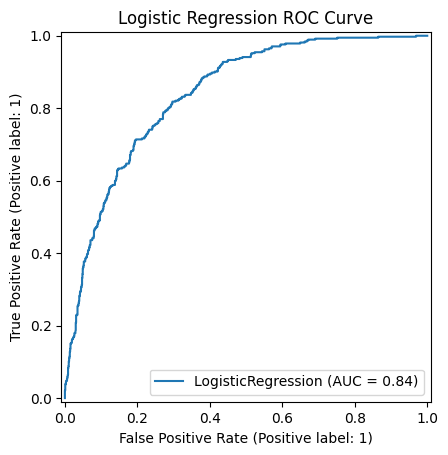

In [ ]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Logistic Regression ROC Curve")
plt.show()


Logical regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



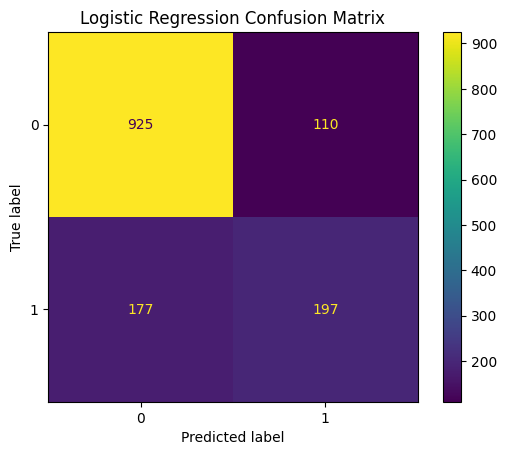

In [ ]:
y_pred_log = logreg.predict(X_test)
# Use y_pred (predictions on the test set) instead of y_pred_train
cm = confusion_matrix(y_test, y_pred_log, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=logreg.classes_)
disp.plot()
disp.ax_.set_title("Logistic Regression Confusion Matrix")
print("Logical regression Classification Report:\n",classification_report(y_test, y_pred_log))

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred_train= RFC.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print ("the accuracy is: ", accuracy)

the accuracy is:  0.9980475683351083


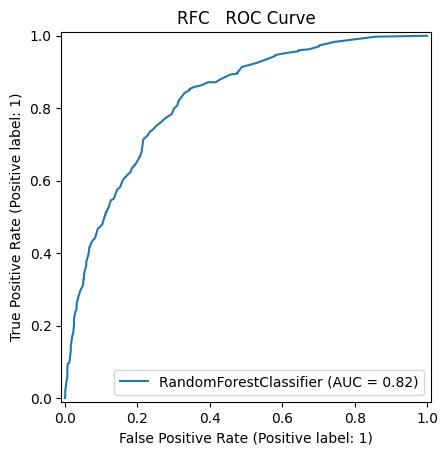

In [ ]:
RocCurveDisplay.from_estimator(RFC, X_test, y_test)
plt.title("RFC   ROC Curve")
plt.show()

Random forest  Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409



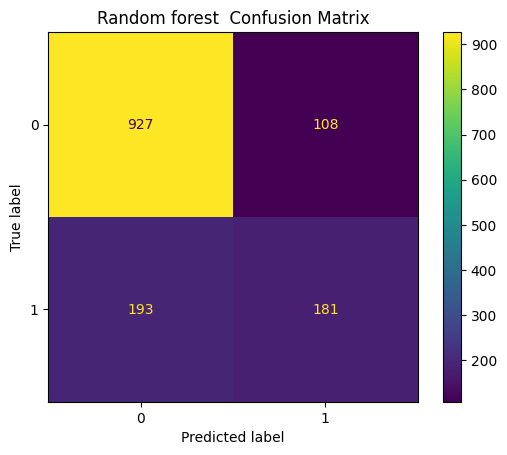

In [ ]:
y_predict_rfc = RFC.predict(X_test)
# Use y_pred (predictions on the test set) instead of y_pred_train
# Correct the variable name from y_pred_rfc to y_predict_rfc
cm = confusion_matrix(y_test, y_predict_rfc, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=RFC.classes_)
disp.plot()
disp.ax_.set_title("Random forest  Confusion Matrix")
print("Random forest  Classification Report:\n",classification_report(y_test, y_predict_rfc))

In [ ]:
!pip install xgboost  # Usually optional in Colab, but safe to include

from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", round(acc_xgb, 4))
print("XGBoost F1 Score:", round(f1_xgb, 4))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:08:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7821
XGBoost F1 Score: 0.5621


In [ ]:
from sklearn.metrics import f1_score

f1_log = f1_score(y_test, y_pred_log)
f1_rfc = f1_score(y_test, y_predict_rfc)
f1_xgb = f1_score(y_test, y_pred_xgb)
best_model = max(f1_log, f1_rfc, f1_xgb)
print("Logistic Regression F1 Score:", round(f1_log, 4))
print("Random Forest F1 Score:", round(f1_rfc, 4))
print("XGBoost F1 Score:", round(f1_xgb, 4))
print("Best Model F1 Score:", round(best_model, 4))


Logistic Regression F1 Score: 0.5786
Random Forest F1 Score: 0.546
XGBoost F1 Score: 0.5621
Best Model F1 Score: 0.5786


In [ ]:
from sklearn.model_selection import GridSearchCV


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Best Logistic Regression Model Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Logistic Regression Model Score (CV Avg): 0.805286831699241


['best_model.pkl']

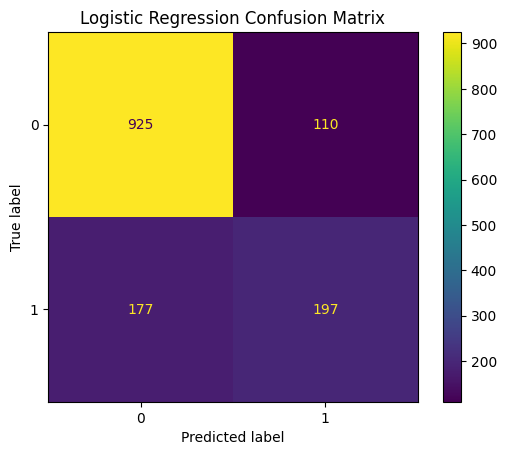

In [ ]:
# Step 1: Compare F1 Scores
f1_scores = {
    "logreg": f1_log,
    "rfc": f1_rfc,
    "xgb": f1_xgb
}

best_model_name = max(f1_scores, key=f1_scores.get)

# Step 2: Tune best model
if best_model_name == "logreg":
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']  # Required for l1 penalty
    }
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    title = "Logistic Regression"

elif best_model_name == "rfc":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    title = "Random Forest"

elif best_model_name == "xgb":
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    }
    grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    title = "XGBoost"

# Step 3: Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=best_model.classes_)
disp.plot()
disp.ax_.set_title(f"{title} Confusion Matrix")

print(f"\n{title} Classification Report:\n", classification_report(y_test, y_pred))
print(f"Best {title} Model Parameters:", grid_search.best_params_)
print(f"Best {title} Model Score (CV Avg):", grid_search.best_score_)

# Save the best model
import joblib
joblib.dump(best_model, "best_model.pkl")

# ***ML Churn code ***

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import io

st.set_page_config(page_title="Interactive Customer Churn", layout="wide")
st.title("📊 Interactive Customer Churn Dashboard")
st.write("Upload your dataset to begin churn prediction.")

# File uploader
uploaded_file = st.file_uploader("Upload CSV", type=["csv"])

if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.subheader("📂 Data Preview")
    st.dataframe(df.head())

    # Load trained model
    model = joblib.load("best_model.pkl")

    # Copy and process data
    df_processed = df.copy()
    drop_cols = ['Churn', 'customerID']
    for col in drop_cols:
      if col in df_processed.columns:
           df_processed.drop(columns=[col], inplace=True)

    label_encoder = LabelEncoder()
    for col in df_processed.select_dtypes(include='object').columns:
        if df_processed[col].nunique() > 2:
            df_processed[col] = label_encoder.fit_transform(df_processed[col]) + 1
        else:
            df_processed[col] = label_encoder.fit_transform(df_processed[col])

    scaler = StandardScaler()
    numeric_cols = df_processed.select_dtypes(include='number').columns
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

    st.subheader("🧪 Processed Data")
    st.dataframe(df_processed.head())

    predictions = model.predict(df_processed)
    df['Predicted Churn'] = predictions

    st.subheader("🔮 Prediction Results")
    st.dataframe(df[['Predicted Churn'] + [col for col in df.columns if col != 'Predicted Churn']])

    st.subheader("📈 Churn Distribution")
    churn_counts = df['Predicted Churn'].value_counts()
    labels = ['No Churn', 'Churn']
    sizes = [churn_counts.get(0, 0), churn_counts.get(1, 0)]
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    st.pyplot(fig)

    # Download
    csv = df.to_csv(index=False)
    b = io.BytesIO()
    b.write(csv.encode())
    b.seek(0)
    st.download_button("📥 Download CSV", b, "churn_predictions.csv", "text/csv")


Overwriting app.py


In [ ]:
!streamlit run app.py &>/dev/null&
!pip install pyngrok

from pyngrok import ngrok
import time
from google.colab import userdata

ngrok.kill()

# Optional: Set your own token
# ngrok.set_auth_token("your-ngrok-auth-token")

# Retrieve and set the authtoken from Colab secrets
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

url = ngrok.connect(8501)
print(f'🌐 Your Streamlit app is live at: {url}')

try:
    while True:
        time.sleep(10)
except KeyboardInterrupt:
    print("Tunnel stopped.")
    ngrok.kill()

🌐 Your Streamlit app is live at: NgrokTunnel: "https://dd6a-35-221-246-150.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py
from pyngrok import ngrok
ngrok.kill()
!streamlit run app.py
from pyngrok import ngrok
url = ngrok.connect(8501)
print(url)